# Task 2- KNN Algorithm
 using Scikit-learn 

In [150]:
# import Required liberary 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import confusion_matrix
# import data
import dataprep as dp
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler

In [151]:
# Read Data 
Data = pd.read_csv("Prostate_Cancer.csv")

## Data Analysis 

In [152]:
Data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [153]:
Data.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [154]:
Data.sample(5)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
72,73,M,21,12,114,929,0.107,0.183,0.193,0.065
81,82,B,17,21,86,520,0.108,0.154,0.194,0.069
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
73,74,M,22,25,90,584,0.101,0.128,0.166,0.066
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [155]:
Data.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [156]:
Data.shape

(100, 10)

In [157]:
Data.duplicated().sum()

0

In [158]:
# chick Null values
Data.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [159]:
# Get all data about your dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [160]:
# Get the statistic about the data
Data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [161]:
# Number of uniqe values in each feature
for column in Data.columns:
    print(Data[column].nunique())

100
2
16
17
55
95
45
85
64
32


In [162]:
# Knowing numerical data 
num=[]
str=[]
for column in Data.columns:
    if Data[column].nunique() >10:
        num.append(column)
    else:
        str.append(column)

In [163]:
num

['id',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'symmetry',
 'fractal_dimension']

In [164]:
str

['diagnosis_result']

<Axes: ylabel='diagnosis_result'>

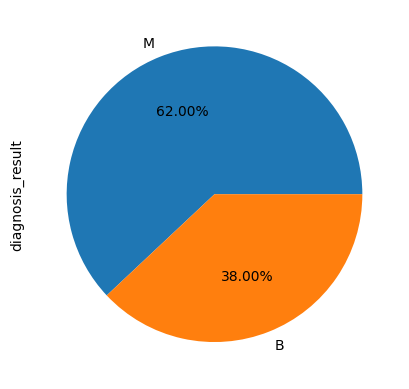

In [165]:
Data['diagnosis_result'].value_counts().plot(kind='pie',autopct = "%1.2f%%")

C:\Users\HP\AppData\Local\Temp\ipykernel_14140\4189526393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['area'])


<Axes: xlabel='area', ylabel='Density'>

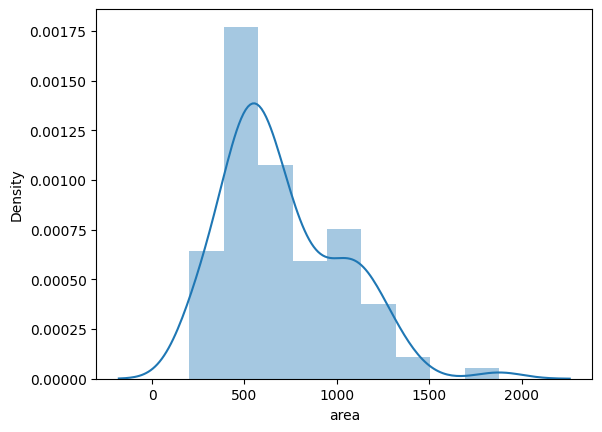

In [166]:
sns.distplot(Data['area'])


C:\Users\HP\AppData\Local\Temp\ipykernel_14140\1582649679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['fractal_dimension'])


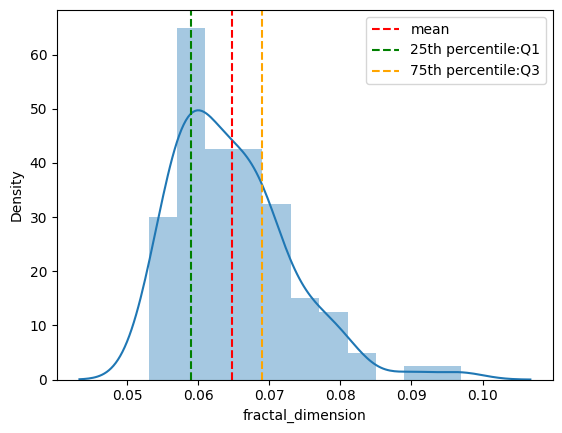

In [167]:
sns.distplot(Data['fractal_dimension'])
plt.axvline(x=np.mean(Data['fractal_dimension']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(Data['fractal_dimension'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(Data['fractal_dimension'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

<Axes: ylabel='symmetry'>

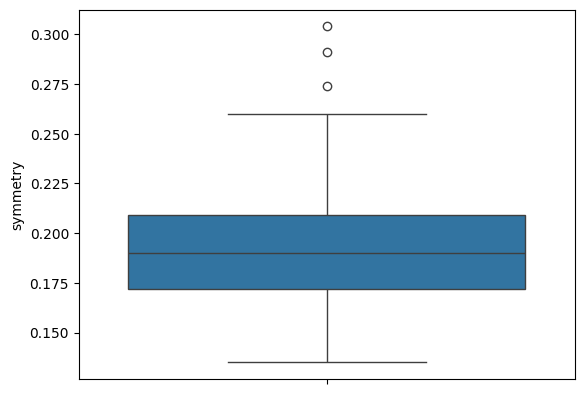

In [168]:
sns.boxplot(Data['symmetry'])

<Axes: ylabel='compactness'>

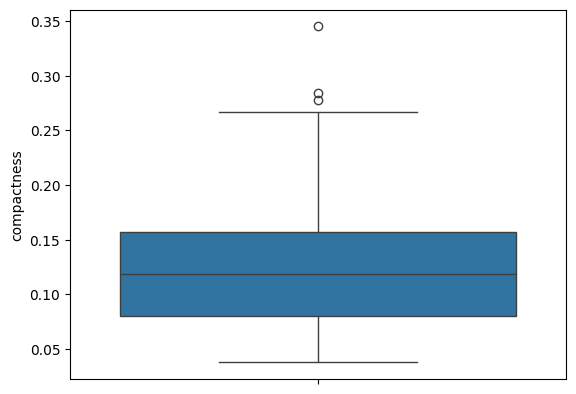

In [169]:
sns.boxplot(Data['compactness'])

<Axes: ylabel='perimeter'>

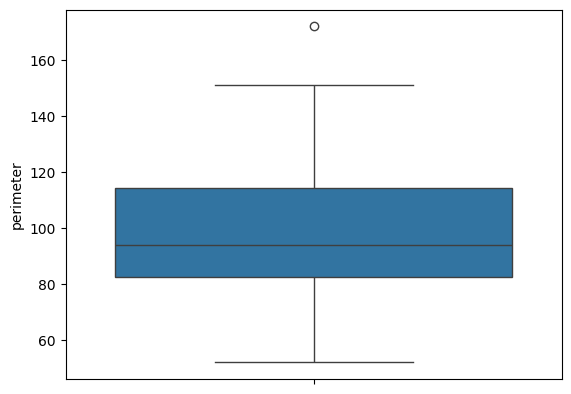

In [170]:
sns.boxplot(Data['perimeter'])

<Axes: ylabel='area'>

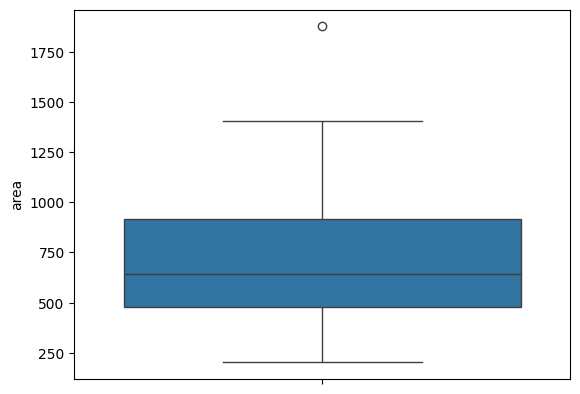

In [171]:
sns.boxplot(Data['area'])

<Axes: ylabel='smoothness'>

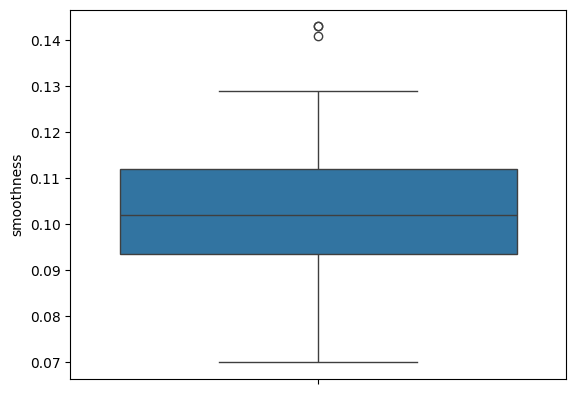

In [172]:
sns.boxplot(Data['smoothness'])

SO All this columns have outliers {
 'perimeter.',
 'area.',
 'smoothness.',
 'compactness.',
 'symmetry.',
}
 


<Axes: xlabel='diagnosis_result', ylabel='texture'>

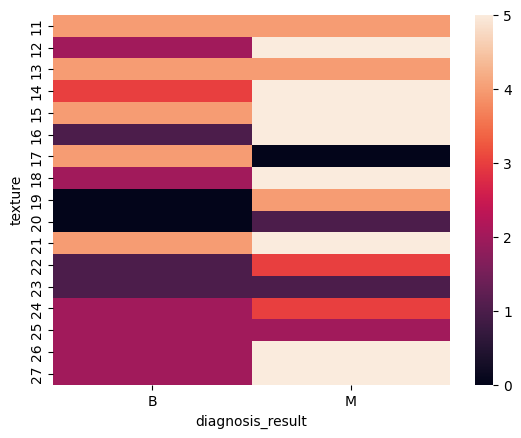

In [173]:
sns.heatmap(pd.crosstab(Data['texture'],Data['diagnosis_result']))

# Data preparation 

In [174]:
# Delete id column as it is not affect the result 
Data.drop(['id'],axis=1,inplace=True)

In [175]:
Data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [176]:
# Encode the non numerical data
Data['diagnosis_result'] = LabelEncoder().fit_transform(Data['diagnosis_result'])
Data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


In [177]:
Data
# 0.064690
# 0.097000

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


### Imputation the outlires data


In [178]:
# smoothness
Data_filter = Data['smoothness']>0.13	
Data.loc[Data_filter,'smoothness']=0.102730

In [179]:
#compactness
Data_filter = Data['compactness']>0.26
Data.loc[Data_filter,'compactness']=0.126700

In [180]:
#perimeter
Data_filter = Data['perimeter']>160
Data.loc[Data_filter,'perimeter']=96.780000

In [181]:
#area
Data_filter = Data['area']>1750
Data.loc[Data_filter,'area']=702.880000

In [182]:
#symmetry
Data_filter = Data['symmetry']>0.26
Data.loc[Data_filter,'symmetry']=0.193170

In [183]:
#fractal_dimension
Data_filter = Data['fractal_dimension']>0.82
Data.loc[Data_filter,'fractal_dimension']=0.064690

# Model

### KNN

In [184]:
X = Data.drop(['diagnosis_result'],axis=1)
Y = Data['diagnosis_result']


In [185]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [186]:
k_scores = np.zeros(20)
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    k_scores[k-1]= knn.score(x_test,y_test)
    # print(str(k) + "Neighbors   score", str(k_scores[k-1]))

In [187]:
# best k
k_best = np.argmax(k_scores)
k_best

12

In [188]:
y_prediction = knn.predict(x_test)
cm = confusion_matrix(y_test,y_prediction)
cm

array([[ 3,  0],
       [ 2, 15]], dtype=int64)

In [189]:
acc = (cm[0][0]+cm[1][1] )/ (cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
sen = (cm[0][0])/(cm[0][0]+cm[1][0])
spe = (cm[1][1])/(cm[1][1]+cm[0][1])
print("Accuracy")
print(acc*100)
print("Sensitivity")
print(sen*100)
print("Specificty")
print(spe*100)


Accuracy
90.0
Sensitivity
60.0
Specificty
100.0


### Radius Neighbors

In [190]:
Rk_score = np.zeros(10)
R = np.linspace(0.05,8,10)
for i in range(len(R)):
    R_knn = RadiusNeighborsClassifier(radius=R[i], outlier_label='most_frequent')
    R_knn.fit(x_train,y_train)
    Rk_score[i] = R_knn.score(x_test,y_test)
    # print(str(R[i]) + ",   score",str(Rk_score[i]))

In [191]:
R_best = R[np.argmax(Rk_score)]
R_best


0.05

In [192]:
yr_prediction = R_knn.predict(x_test)
cm_r = confusion_matrix(y_test,yr_prediction)
cm_r

array([[ 1,  2],
       [ 1, 16]], dtype=int64)

In [193]:
R_acc = (cm_r[0][0]+cm_r[1][1] )/ (cm_r[0][0]+cm_r[1][1]+cm_r[0][1]+cm_r[1][0])
R_sen = (cm_r[0][0])/(cm_r[0][0]+cm_r[1][0])
R_spe = (cm_r[1][1])/(cm_r[1][1]+cm_r[0][1])
print("Accuracy")
print(R_acc*100)
print("Sensitivity")
print(R_sen*100)
print("Specificty")
print(R_spe*100)

Accuracy
85.0
Sensitivity
50.0
Specificty
88.88888888888889
